<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
#!pip install -U scikit-learn
%pip install tqdm
%pip install pandas
%pip install seaborn
%pip install numpy

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:

data = pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
data.duplicated(subset = ['car_ID']).sum()

0

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
data = data.drop(['car_ID'], axis =1) # Index column is an insignificant column.

In [8]:
data.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [11]:
data['car_company'] = data['CarName'].apply(lambda x:x.split(' ')[0]) 

In [12]:
data['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [13]:
data = data.drop(['CarName'], axis =1)

In [14]:
data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [15]:
data['car_company'].replace('toyouta', 'toyota',inplace=True)
data['car_company'].replace('Nissan', 'nissan',inplace=True)
data['car_company'].replace('maxda', 'mazda',inplace=True)
data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
data['car_company'].replace('vw', 'volkswagen',inplace=True)
data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [16]:
data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [17]:
corr_matrix=data.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-17-1cf31db57ec0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [18]:
data.drop(['highwaympg', 'citympg', 'peakrpm', 'symboling', 'compressionratio','stroke'], axis=1, inplace=True)

<Figure size 3000x3000 with 0 Axes>

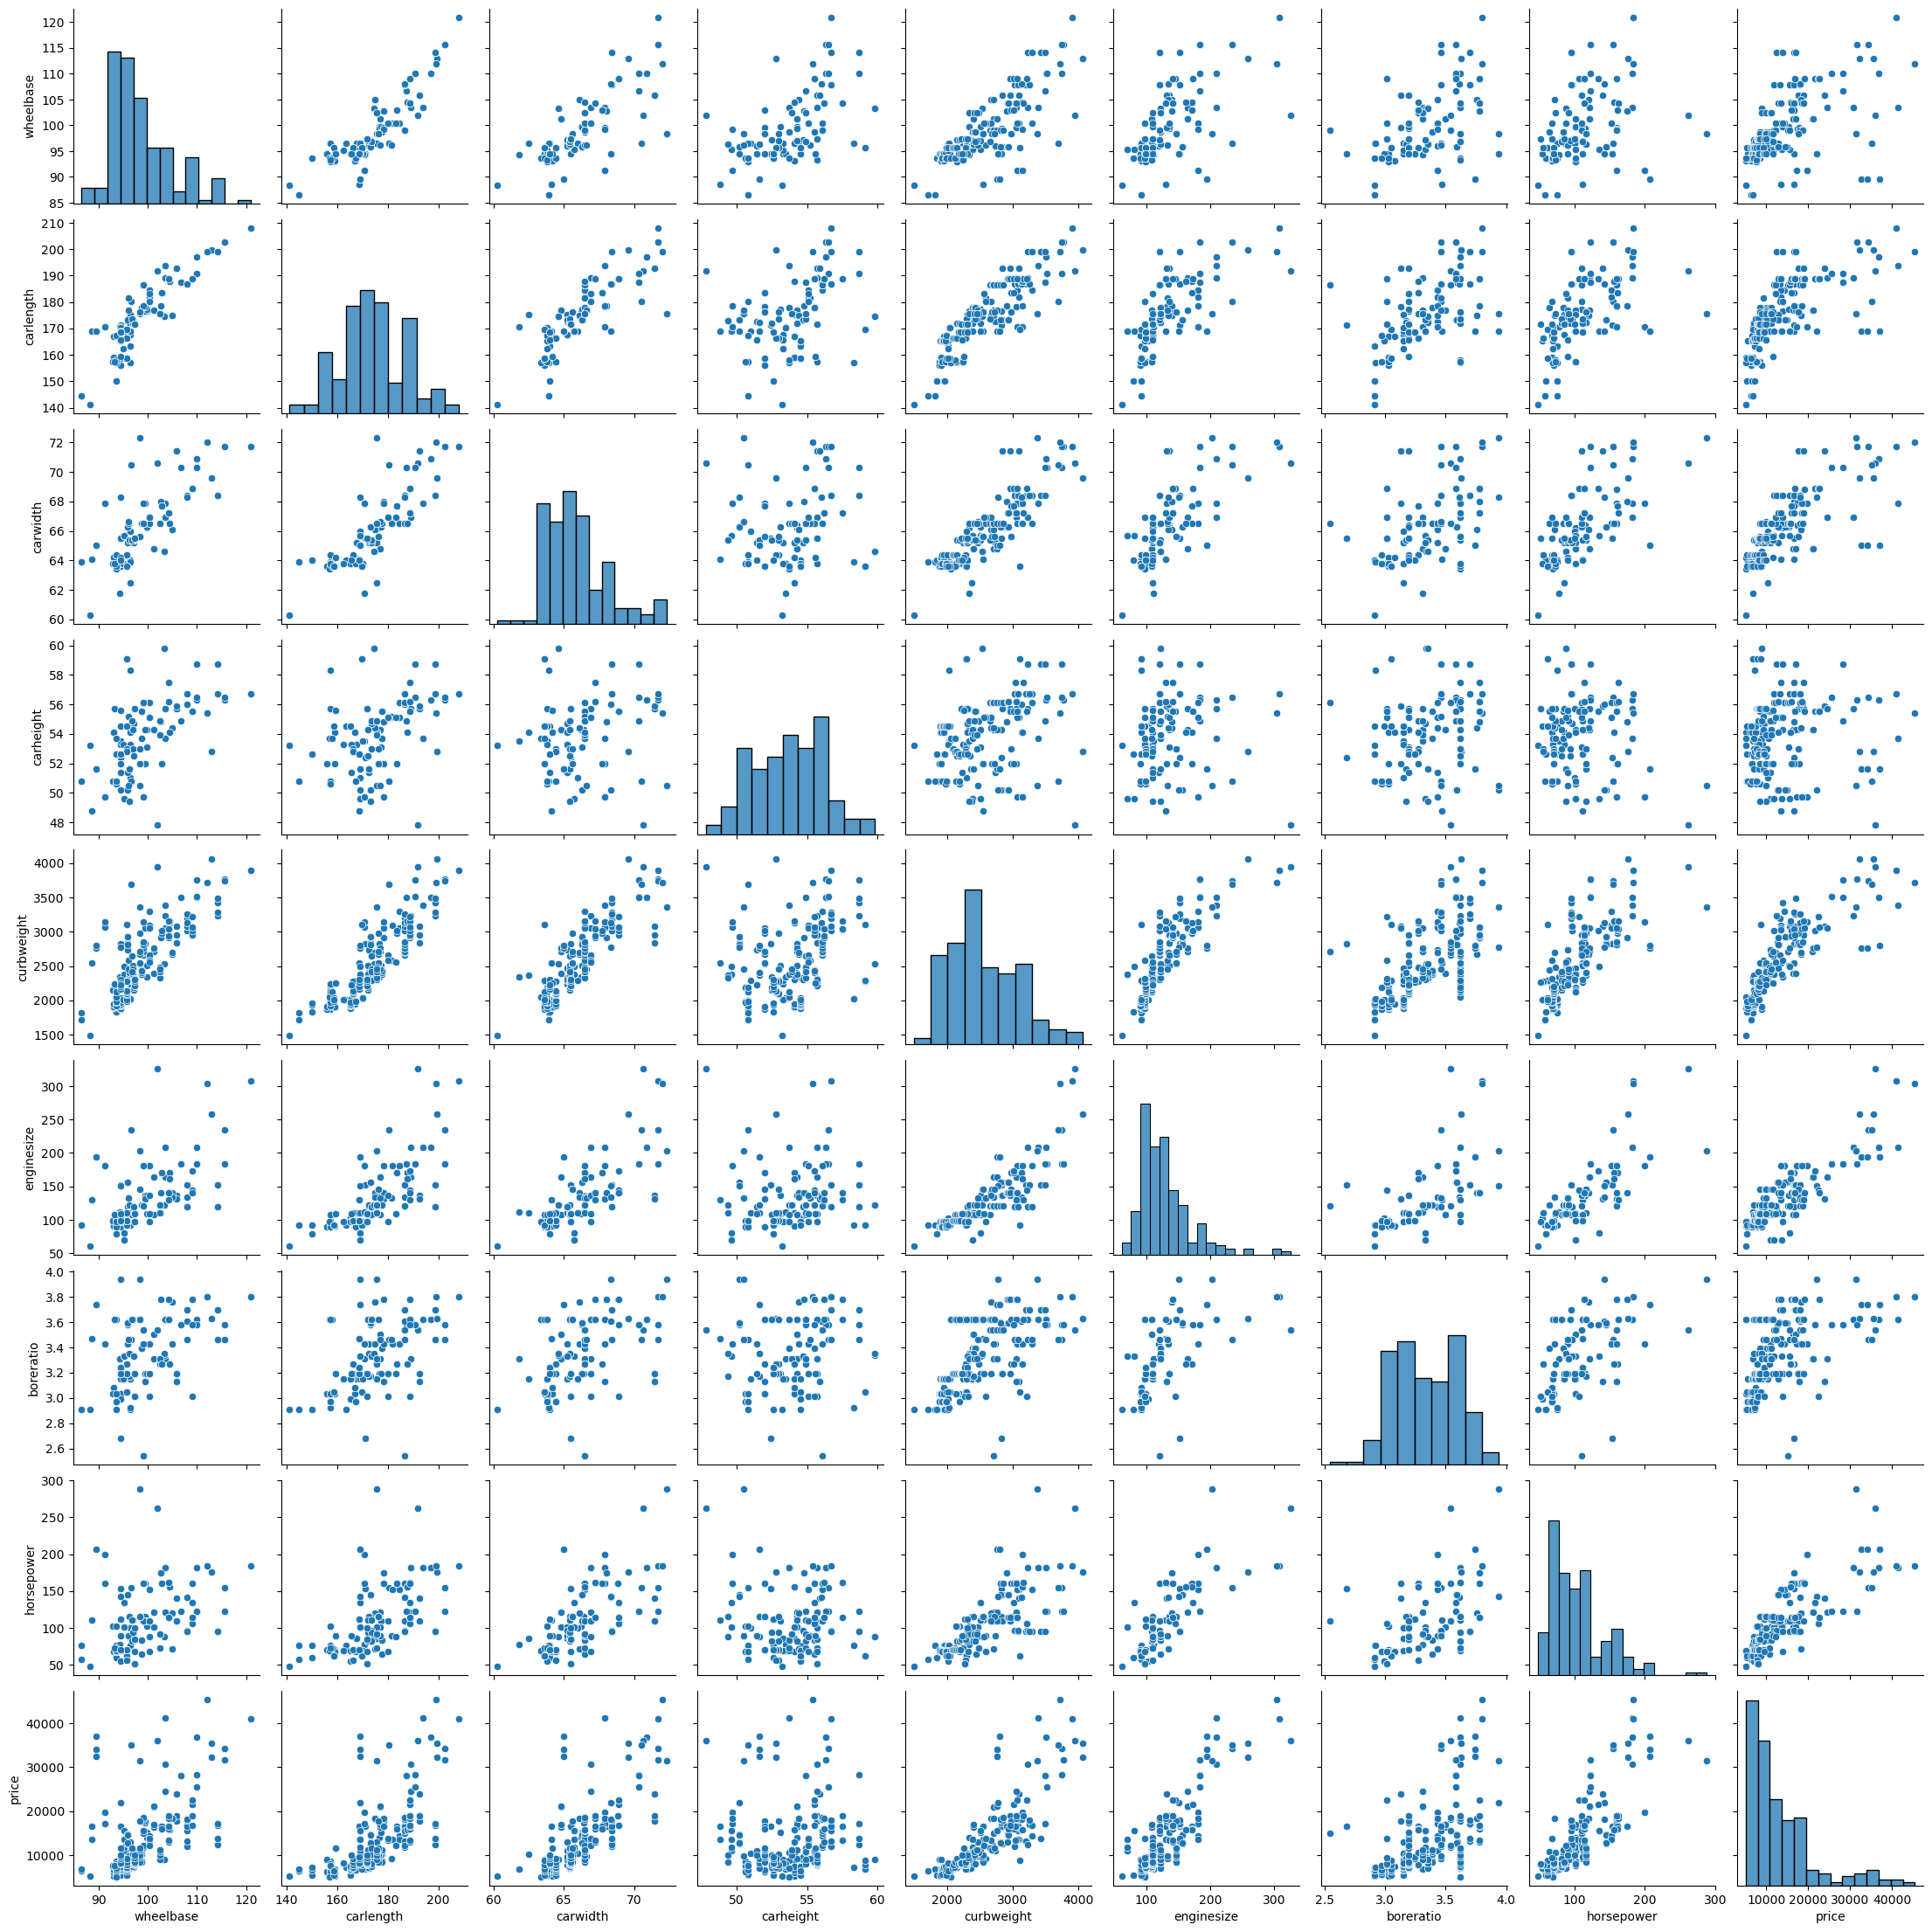

In [19]:
cars_numeric = data.select_dtypes(include =['int64','float64'])
cars_numeric.head()
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

<ipython-input-20-320078decf5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True ,cmap = 'YlGnBu')


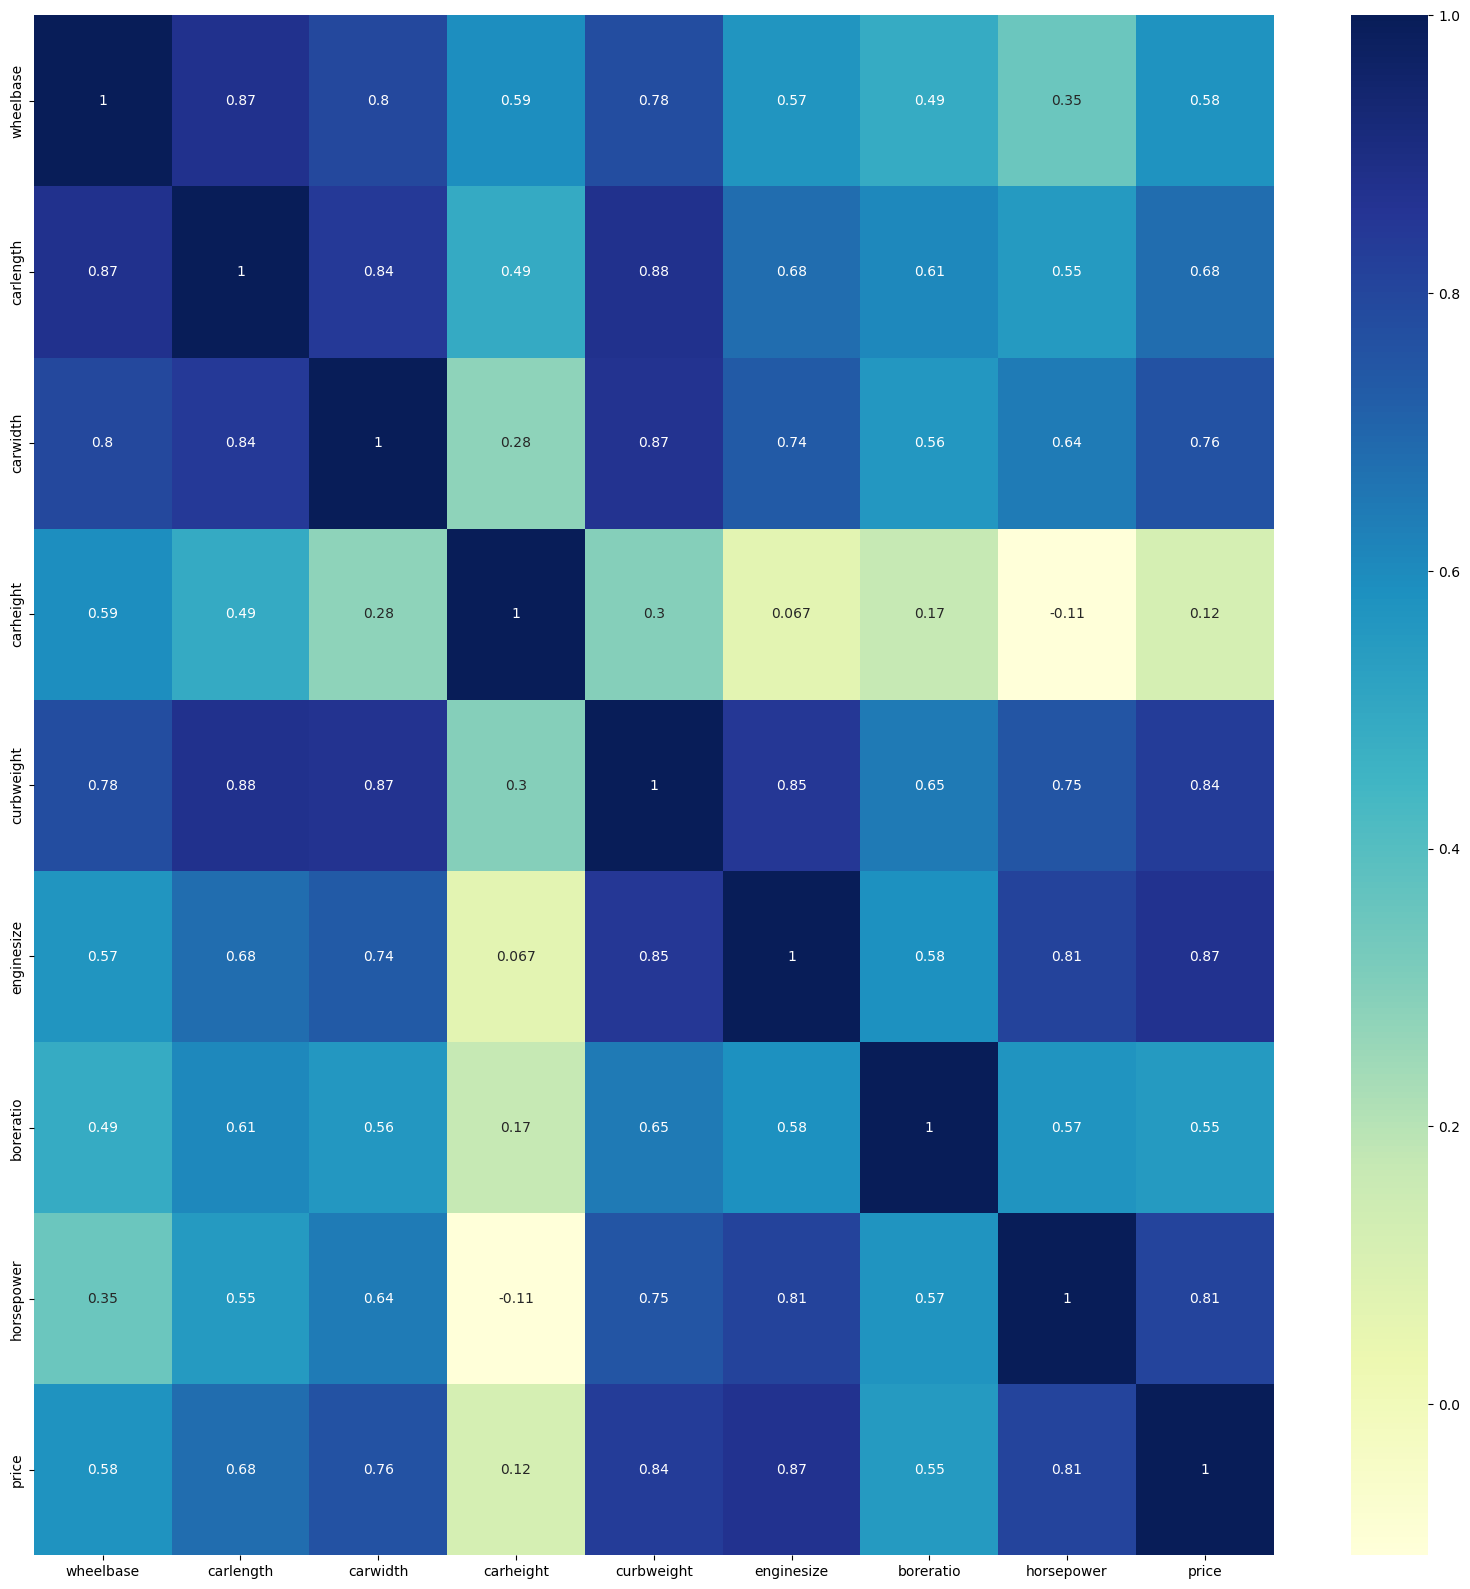

In [20]:

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [21]:
categorical_cols = data.select_dtypes(include=['object'])
categorical_cols.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

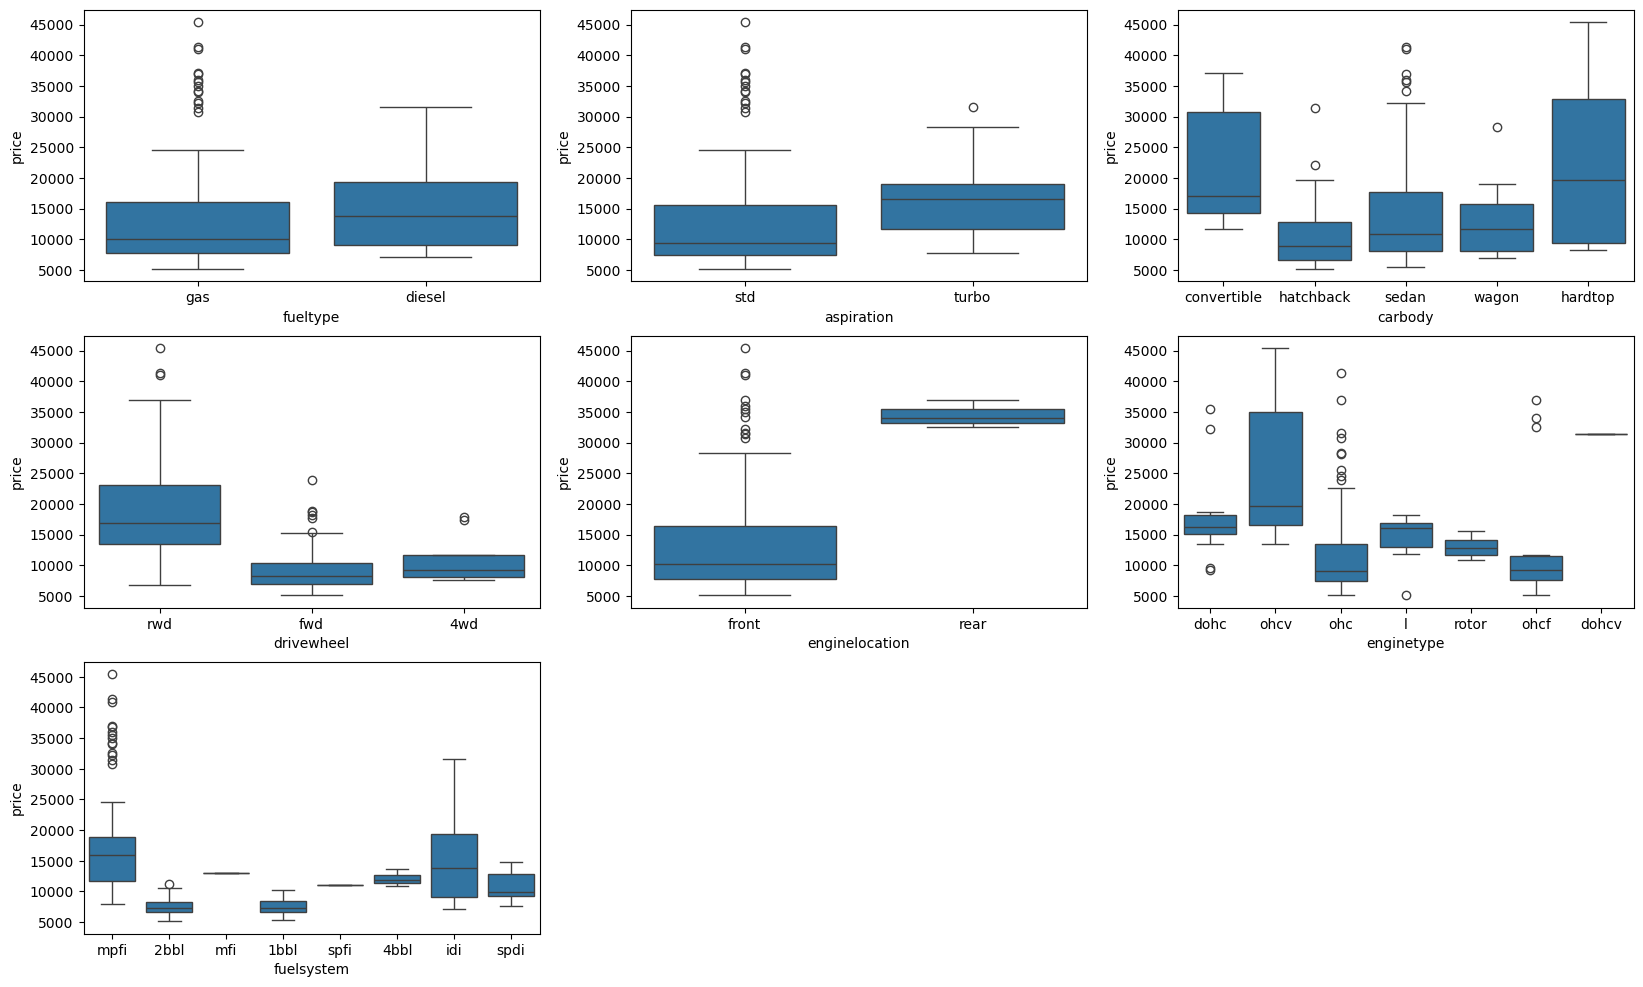

In [22]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fueltype', y='price', data=data)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=data)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='carbody', y='price', data=data)

plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=data)

plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=data)

plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=data)

plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=data)

<AxesSubplot:xlabel='car_company', ylabel='price'>

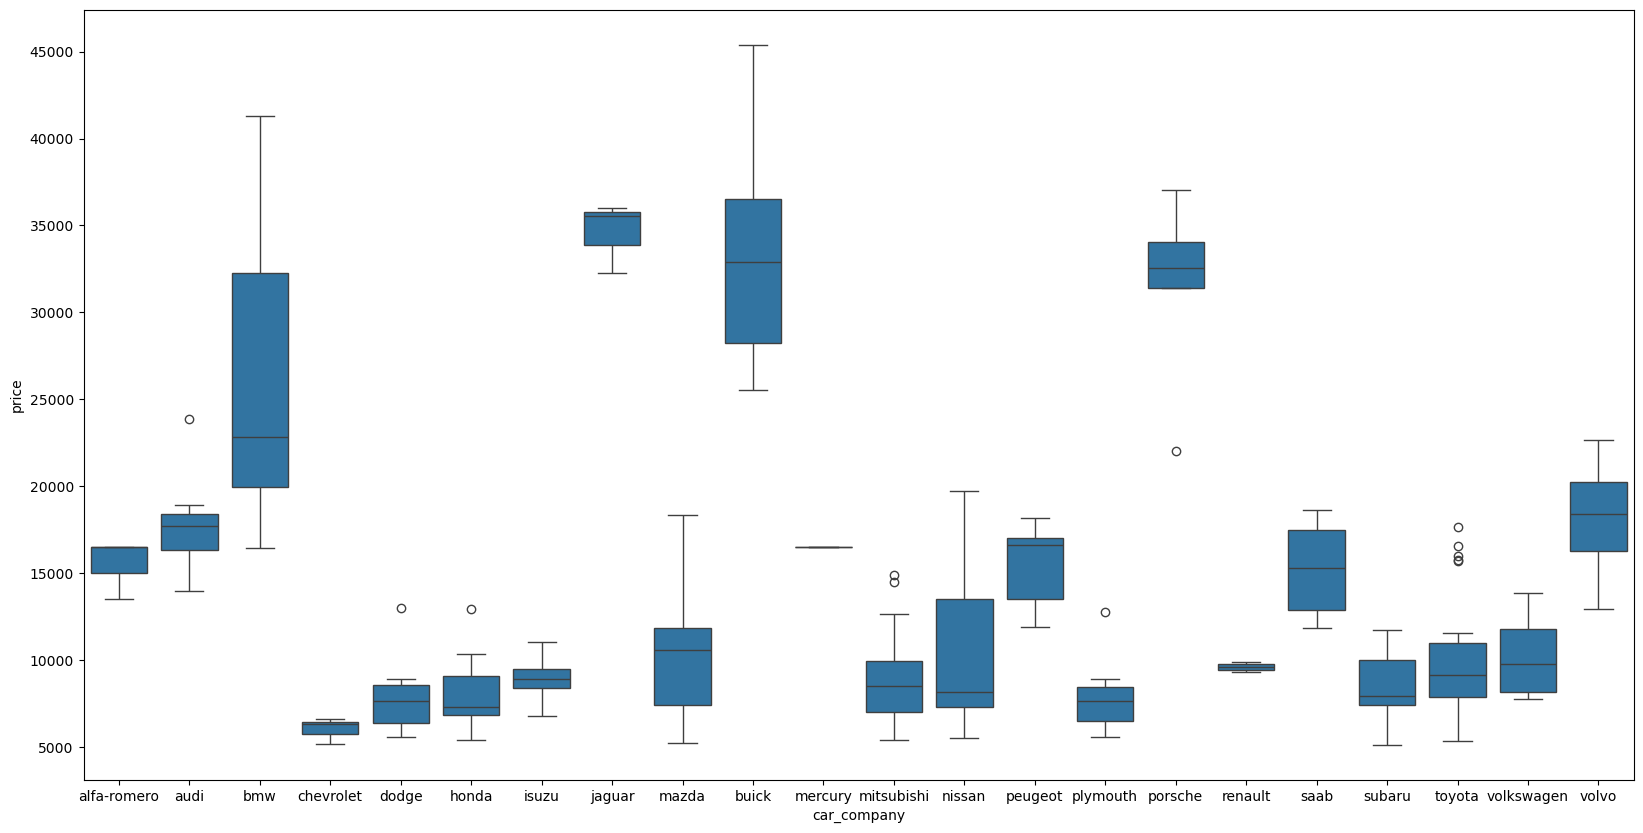

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='car_company', y='price', data=data)

In [24]:
tmp=np.log(data['horsepower'])

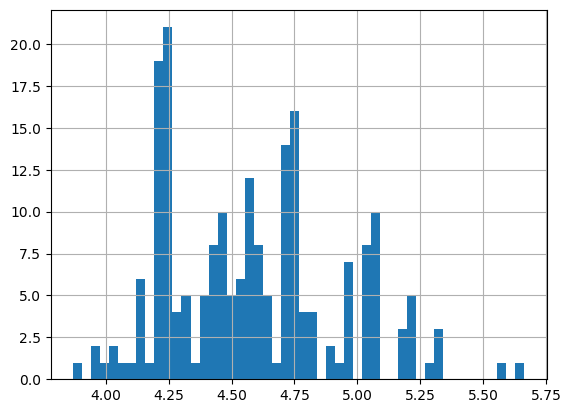

In [25]:
tmp.hist(bins=50)
plt.show()

In [26]:
corr_matrix=data.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-26-1cf31db57ec0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
Name: price, dtype: float64

<AxesSubplot:xlabel='horsepower', ylabel='price'>

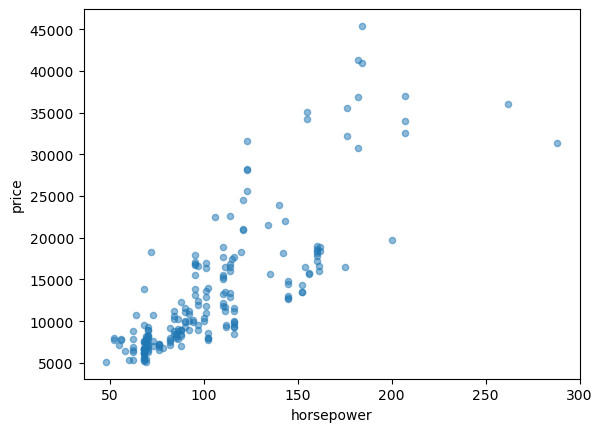

In [27]:
data.plot(kind='scatter', x='horsepower', y='price', alpha=0.5)

In [28]:
col_list = ['doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight',  'enginesize', 'boreratio',
         'horsepower', 'price']

/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  horsepower    price    0  ...   40   41   42   43   44   45  \
0       3.47         111  13495.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1       3.47         111  16500.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2       2.68         154  16500.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3       3.19         102  13950.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4       3.19         115  17450.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

    46   47   48   49  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  

/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+08, tolerance: 1.302e+06
  model = cd_fast.enet_coordinate_descent(


   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  horsepower    0    1  ...   40   41   42   43   44   45   46  \
0       3.47         111  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       3.47         111  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       2.68         154  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       3.19         102  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       3.19         115  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    47   48   49  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  

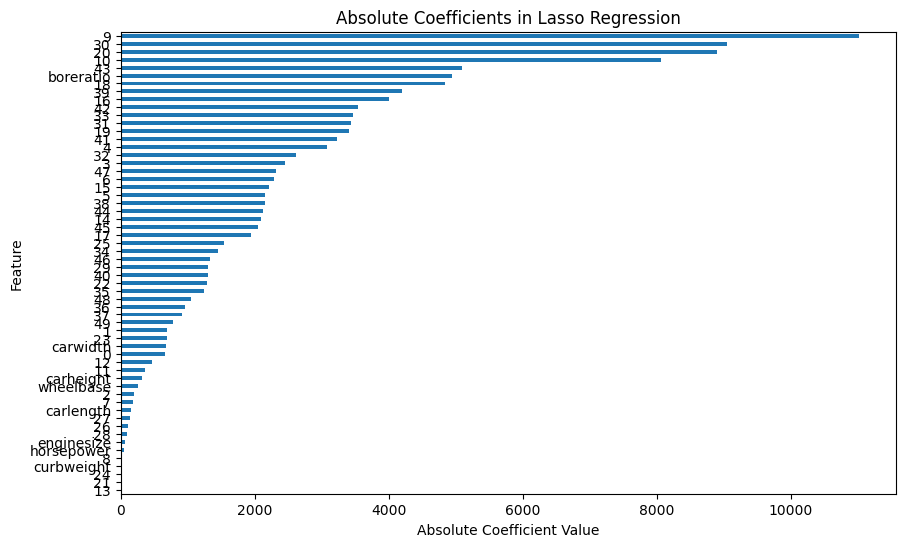

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder

# Örnek bir veri çerçevesi oluşturalım
# Veri çerçevesi adı data olarak varsayılmıştır

# 1. Kategorik sütunları belirleyin
categorical_columns = data.select_dtypes(include=['object']).columns

# 2. Kategorik sütunları uygun şekilde dönüştürün
encoder = OneHotEncoder(drop='first', sparse=False)  # One-hot encoding kullanarak dönüştürüyoruz
encoded_categorical = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))

# 3. Veri çerçevesinden kategorik sütunları çıkarın ve dönüştürülmüş sütunları ekleyin
data.drop(columns=categorical_columns, inplace=True)
data = pd.concat([data, encoded_categorical], axis=1)

# Veri çerçevesini kontrol edin
print(data.head())

# Model için özellik ve hedef değişkenlerini tanımlayın
X = data.drop(columns=['price'])  # Özellikler: Price dışındaki tüm sütunlar
X.columns = X.columns.astype(str)  # Sütun isimlerini string türe dönüştür
y = data['price']  # Hedef: Price sütunu

# Lasso regresyon modelini oluşturun ve eğitin
lasso = Lasso(alpha=0.1)  # Alfa değeri uygun bir şekilde ayarlanmalıdır
lasso.fit(X, y)

# Katsayıları (coefficients) al
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Katsayıları sırala
sorted_coefficients = coefficients.abs().sort_values()

# En düşük katsayılara sahip özellikleri sil
threshold = 0.1  # Uygun bir eşik değeri belirleyin
X.drop(sorted_coefficients[sorted_coefficients < threshold].index, axis=1, inplace=True)

# Sonuçları kontrol edin
print(X.head())
plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Absolute Coefficients in Lasso Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   carheight   205 non-null    float64
 4   curbweight  205 non-null    int64  
 5   enginesize  205 non-null    int64  
 6   boreratio   205 non-null    float64
 7   horsepower  205 non-null    int64  
 8   price       205 non-null    float64
 9   0           205 non-null    float64
 10  1           205 non-null    float64
 11  2           205 non-null    float64
 12  3           205 non-null    float64
 13  4           205 non-null    float64
 14  5           205 non-null    float64
 15  6           205 non-null    float64
 16  7           205 non-null    float64
 17  8           205 non-null    float64
 18  9           205 non-null    float64
 19  10          205 non-null    f

In [31]:
data = data.iloc[:, :9]

# Veri çerçevesini kontrol et
print(data.head())

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  horsepower    price  
0       3.47         111  13495.0  
1       3.47         111  16500.0  
2       2.68         154  16500.0  
3       3.19         102  13950.0  
4       3.19         115  17450.0  


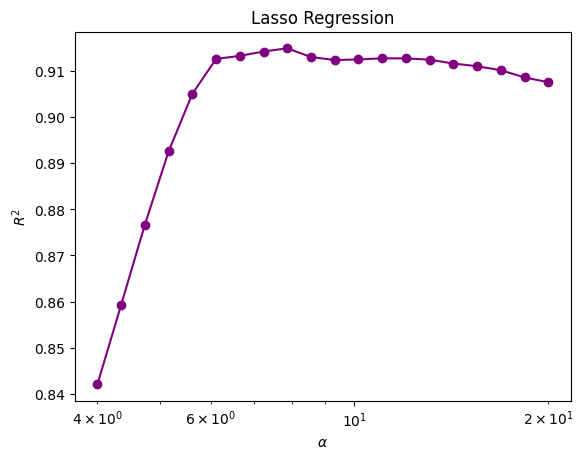

In [33]:
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
trainX = X  
trainY = y 
s = StandardScaler()
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

scores = []
alphas = np.geomspace(4, 20, 20)
predictions_lsr = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=10000000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    
    predictions_lsr = cross_val_predict(estimator, trainX, trainY, cv=kf)
    
   
    score = r2_score(trainY, predictions_lsr)
    
    scores.append(score)


plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   carheight   205 non-null    float64
 4   curbweight  205 non-null    int64  
 5   enginesize  205 non-null    int64  
 6   boreratio   205 non-null    float64
 7   horsepower  205 non-null    int64  
 8   price       205 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


In [35]:
corr_matrix=data.corr()
corr_matrix['price'].sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
Name: price, dtype: float64

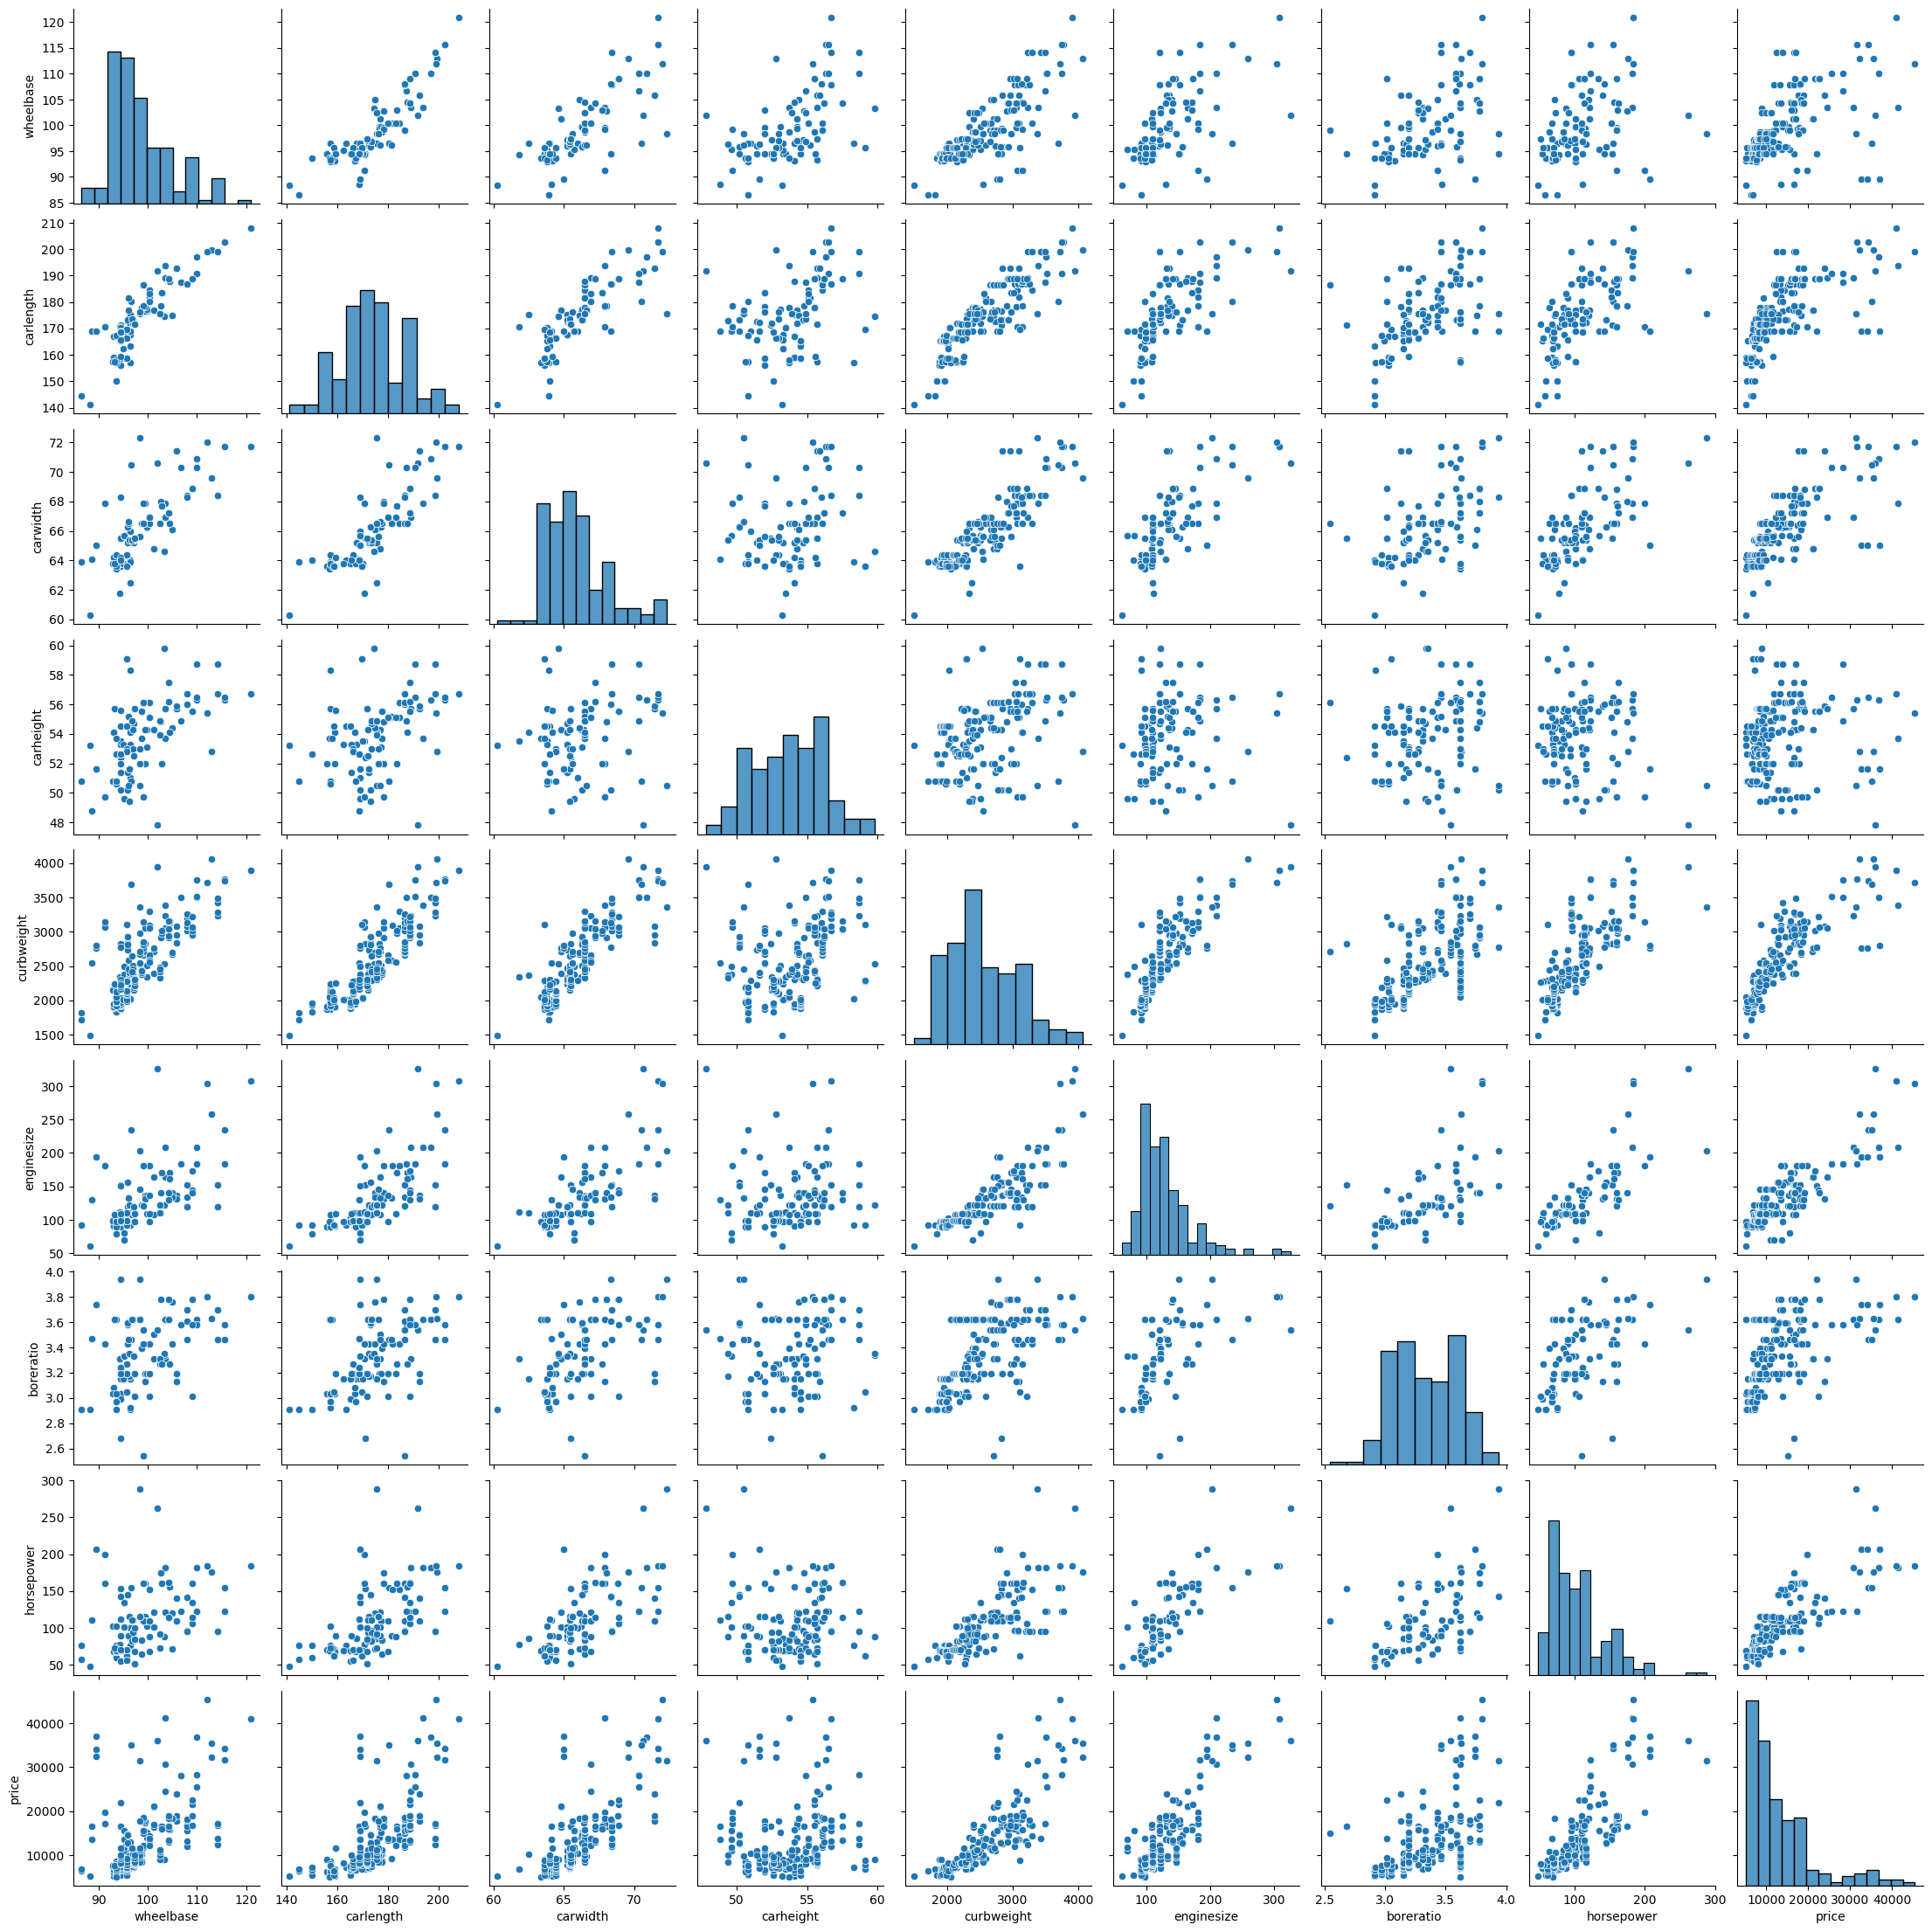

In [36]:
sns.pairplot(data)
plt.show()

In [37]:
data['horsepower']=np.log(data['horsepower'])
#data['Age']=np.log(data['Age'])
data['curbweight']=np.log(data['curbweight'])
data['enginesize']=np.log(data['enginesize'])
data['carlength']=np.log(data['carlength'])
data['carwidth']=np.log(data['carwidth'])
data['price']=np.log(data['price'])


# 2. Objectives


In [38]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(data, test_size=0.3, random_state=42)

In [39]:
print("Number of examples in train set:",train_set.shape[0])
print("Number of examples in test set:",test_set.shape[0])

Number of examples in train set: 143
Number of examples in test set: 62


In [40]:
trainX=train_set.drop('price', axis=1)
trainY=train_set['price'].copy()

testX=test_set.drop('price', axis=1)
testY=test_set['price'].copy()

In [41]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(143, 8)
(143,)
(62, 8)
(62,)


<AxesSubplot:>

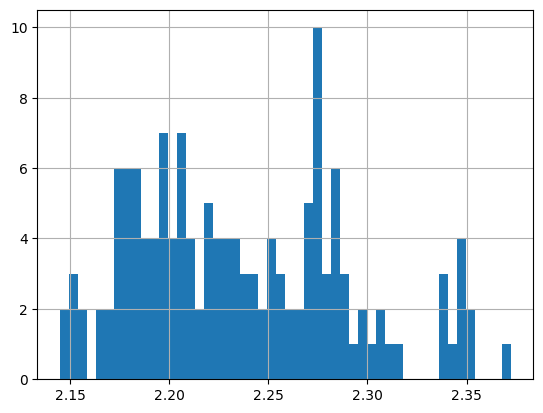

In [42]:
price_log=np.log(trainY)
price_log.hist(bins=50)

In [43]:
price_log

177    2.233015
75     2.273290
174    2.227626
31     2.178465
12     2.297658
         ...   
106    2.284426
14     2.313434
92     2.178365
179    2.270085
102    2.259147
Name: price, Length: 143, dtype: float64

In [44]:
print(lasso.intercept_)

-18341.22912325163


In [45]:
from scipy.stats import boxcox
price_bc=boxcox(trainY)
price_bc

(array([0.239652  , 0.23965533, 0.23965151, 0.23964649, 0.23965709,
        0.23964727, 0.23965742, 0.23965117, 0.23964664, 0.23965605,
        0.23964777, 0.23964493, 0.23965542, 0.23965033, 0.2396533 ,
        0.23965317, 0.23964614, 0.23964831, 0.23964778, 0.23965624,
        0.23965549, 0.23965605, 0.23965533, 0.23964514, 0.23965182,
        0.23964778, 0.23966005, 0.23964674, 0.23964241, 0.23964727,
        0.23965559, 0.23965141, 0.23964555, 0.23965483, 0.23965389,
        0.23964586, 0.23965552, 0.23965637, 0.23964846, 0.23965587,
        0.23964915, 0.2396598 , 0.23965508, 0.23964698, 0.23965576,
        0.23964321, 0.23965294, 0.23965028, 0.23965539, 0.2396484 ,
        0.23965529, 0.23965107, 0.23964367, 0.23964307, 0.23965195,
        0.23965367, 0.23964837, 0.23964834, 0.23965964, 0.23965756,
        0.23965199, 0.23964961, 0.23965006, 0.23964961, 0.23965112,
        0.23965347, 0.23964961, 0.23964831, 0.23964943, 0.23965229,
        0.23964907, 0.23964952, 0.23965585, 0.23

(array([2., 1., 2., 2., 0., 0., 1., 2., 1., 6., 4., 4., 4., 1., 5., 8., 2.,
        3., 7., 2., 4., 3., 5., 2., 4., 4., 2., 3., 3., 3., 4., 2., 4., 8.,
        5., 5., 6., 1., 2., 3., 1., 1., 0., 0., 0., 4., 5., 1., 0., 1.]),
 array([0.23964241, 0.23964279, 0.23964318, 0.23964356, 0.23964394,
        0.23964432, 0.2396447 , 0.23964508, 0.23964547, 0.23964585,
        0.23964623, 0.23964661, 0.23964699, 0.23964737, 0.23964776,
        0.23964814, 0.23964852, 0.2396489 , 0.23964928, 0.23964966,
        0.23965005, 0.23965043, 0.23965081, 0.23965119, 0.23965157,
        0.23965196, 0.23965234, 0.23965272, 0.2396531 , 0.23965348,
        0.23965386, 0.23965425, 0.23965463, 0.23965501, 0.23965539,
        0.23965577, 0.23965615, 0.23965654, 0.23965692, 0.2396573 ,
        0.23965768, 0.23965806, 0.23965844, 0.23965883, 0.23965921,
        0.23965959, 0.23965997, 0.23966035, 0.23966073, 0.23966112,
        0.2396615 ]),
 <BarContainer object of 50 artists>)

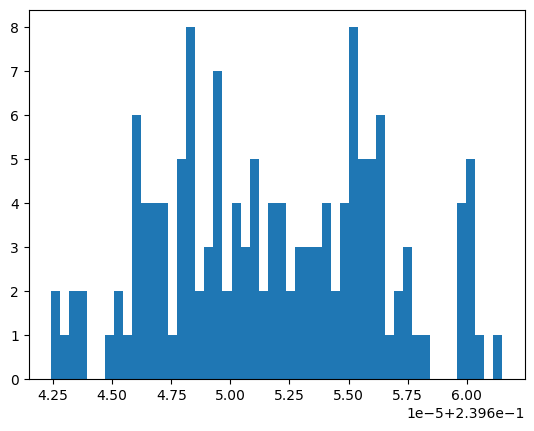

In [46]:
plt.hist(price_bc[0], bins=50)

In [47]:
lam_bc=price_bc[1]
print(lam_bc)

-4.172342083901405


# 3. Linear Regression Models


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)

In [49]:
print(trainX_scaled)

[[ 0.57330873  0.11165569  0.2541587  ...  0.00390659 -0.03890939
  -0.23104434]
 [ 0.62287532  0.33538976  0.9414448  ...  0.50715917  1.692945
   1.67336678]
 [ 0.57330873  0.11165569  0.2541587  ... -0.37472    -0.18630125
  -0.91618829]
 ...
 [-0.73194494 -0.74323524 -1.02296244 ... -0.83463233 -0.62847684
  -1.08309279]
 [ 0.65591972  0.73402769  0.80520854 ...  1.2385946  -0.18630125
   1.42640954]
 [ 0.24286476  0.81855488  0.2541587  ...  1.44642272  0.4032662
   1.25603708]]


In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(trainX_scaled, trainY)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

testX_scaled = scaler.transform(testX)
y_pred = model.predict(testX_scaled)
mse = mean_squared_error(testY, y_pred)
r2=r2_score(testY, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("r2 score on Test Set:", r2)


y_pred = model.predict(trainX_scaled)
mse = mean_squared_error(trainY, y_pred)
r2=r2_score(trainY, y_pred)
print("Mean Squared Error on Train Set:", mse)
print("r2 score on Train Set:", r2)

Mean Squared Error on Test Set: 0.046187036235054865
r2 score on Test Set: 0.8208240178119081
Mean Squared Error on Train Set: 0.0335302263262534
r2 score on Train Set: 0.8657158003576866


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   carheight   205 non-null    float64
 4   curbweight  205 non-null    float64
 5   enginesize  205 non-null    float64
 6   boreratio   205 non-null    float64
 7   horsepower  205 non-null    float64
 8   price       205 non-null    float64
dtypes: float64(9)
memory usage: 14.5 KB


In [53]:
coefficients = model.coef_
feature_names = trainX.columns 
feature_coefficients = dict(zip(feature_names, coefficients))

print(feature_coefficients)

{'wheelbase': -0.03202765853892161, 'carlength': 0.02249311686481323, 'carwidth': 0.09440314487237769, 'carheight': 0.006277979563075305, 'curbweight': 0.19696839652169804, 'enginesize': 0.05102371119456259, 'boreratio': -0.01580926416055408, 'horsepower': 0.17762540286710904}


In [54]:
from scipy.special import inv_boxcox

model_bc=LinearRegression()
# Fit model on transformed target variables 
model_bc.fit(trainX_scaled, price_bc[0])

y_pred_bc = model_bc.predict(testX_scaled)
y_pred= inv_boxcox(y_pred_bc, lam_bc)
mse = mean_squared_error(testY, y_pred)
r2=r2_score(testY, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("r2 score on Test Set:", r2)


y_pred_bc = model_bc.predict(trainX_scaled)
y_pred= inv_boxcox(y_pred_bc, lam_bc)
mse = mean_squared_error(trainY, y_pred)
r2=r2_score(trainY, y_pred)
print("Mean Squared Error on Train Set:", mse)
print("r2 score on Train Set:", r2)

Mean Squared Error on Test Set: 0.040363952389171474
r2 score on Test Set: 0.8434138363518966
Mean Squared Error on Train Set: 0.037844065925778714
r2 score on Train Set: 0.848439433286045


In [55]:
coefficients = model_bc.coef_
feature_names = trainX.columns 
feature_coefficients = dict(zip(feature_names, coefficients))

print(feature_coefficients)

{'wheelbase': -5.695299975043266e-07, 'carlength': 7.859279348500754e-07, 'carwidth': 5.91719681717374e-07, 'carheight': 4.543546565581338e-08, 'curbweight': 2.2468609565574517e-06, 'enginesize': -2.1182135913770988e-07, 'boreratio': -1.042436221876747e-07, 'horsepower': 1.706702878262931e-06}


In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
trainX_poly = poly_features.fit_transform(trainX_scaled)
print(trainX_poly.shape)

(143, 44)


In [57]:
# Fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(trainX_poly, trainY)

LinearRegression()

In [58]:
testX_poly = poly_features.transform(testX_scaled)
y_pred = model_poly.predict(testX_poly)
mse = mean_squared_error(testY, y_pred)
r2=r2_score(testY, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("r2 score on Test Set:", r2)


y_pred = model_poly.predict(trainX_poly)
mse = mean_squared_error(trainY, y_pred)
r2=r2_score(trainY, y_pred)
print("Mean Squared Error on Train Set:", mse)
print("r2 score on Train Set:", r2)


Mean Squared Error on Test Set: 0.05165953451191137
r2 score on Test Set: 0.7995942457003518
Mean Squared Error on Train Set: 0.01839000632796443
r2 score on Train Set: 0.9263504141863119


In [59]:
# Fit model on transformed target variables 
model_poly_bc=LinearRegression()
model_poly_bc.fit(trainX_poly, price_bc[0])

y_pred_bc = model_poly_bc.predict(testX_poly)
y_pred= inv_boxcox(y_pred_bc, lam_bc)
mse = mean_squared_error(testY, y_pred)
r2=r2_score(testY, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("r2 score on Test Set:", r2)


y_pred_bc = model_poly_bc.predict(trainX_poly)
y_pred= inv_boxcox(y_pred_bc, lam_bc)
mse = mean_squared_error(trainY, y_pred)
r2=r2_score(trainY, y_pred)
print("Mean Squared Error on Train Set:", mse)
print("r2 score on Train Set:", r2)

Mean Squared Error on Test Set: 0.11610253033031946
r2 score on Test Set: 0.5495968868712795
Mean Squared Error on Train Set: 0.01986297256987875
r2 score on Train Set: 0.920451375779263


In [60]:
print(model_poly.coef_)

[ 0.02128634  0.09851922  0.01542611  0.00982636  0.11737321  0.10086453
 -0.04161013  0.12571542 -0.01593959  0.24154289  0.03225407  0.04713885
 -0.44411893  0.2464722  -0.09377264  0.0336077   0.03171963 -0.03690352
 -0.02512424 -0.10300853 -0.19047825  0.03560576  0.08883381 -0.02303129
  0.0009858   0.38160331 -0.27918684  0.05005053 -0.04039158 -0.02906389
 -0.03278858 -0.01691141  0.01402174  0.0387449   0.05101537  0.11741787
  0.0242326  -0.29352933  0.14650632 -0.09973192 -0.02827513  0.03585855
  0.10741923  0.05569112]


# 4. Insights and key findings


In [63]:
#The mean squared error on the test set is 0.1161, indicating that the model's predictions, on average, deviate from the actual values by approximately 0.1161 units squared.
#The MSE on the train set is 0.0199, which is significantly lower than the MSE on the test set. This suggests that the model might be overfitting the training data as it performs much better on the data it was trained on compared to unseen data.

In [64]:
#The R2 score on the test set is 0.5496, indicating that approximately 54.96% of the variance in the target variable is explained by the model. This suggests that the model provides a moderate fit to the test data.
#The R2 score on the train set is 0.9205, which is considerably higher than the R2 score on the test set. This again indicates potential overfitting, where the model fits the training data very well but might not generalize well to unseen data.

In [65]:
#The model performs reasonably well on the test set, as indicated by the R2 score. However, there is room for improvement, especially in reducing the MSE and potentially addressing overfitting.
#Given the disparity between the performance metrics on the train and test sets, further evaluation of the model's complexity and potential regularization techniques may be necessary to improve its generalization capabilities.

# 5. Next Steps


In [66]:
#We might attempt Lasso optimization again with GridSearchCV.

In [62]:
#We could use the location or iso_code columns to one-hot encode and use that to train our models in order to forecast the impact on GDP for a specific nation. It might be possible to obtain more accurate results by keeping more frequent records on particular countries.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
